# Create media designs suggested by ART

We use ART to provide suggested designs for media components for which to get phenotypic data. 

For DBTL 4 we create 8 designs from an exploratory mode with $\alpha=1.$, 7 designs from the exploitation mode ($\alpha=0$) and 1 design being close to the standard media as a control, totalling 16 designs in triplicates. 

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required files to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`
- EDD study slug(s)

**File generated by running this notebook**

- 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [51]:
import sys
sys.path.append('../../AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
sys.path.append('../')
import re
import warnings
    
from art.core import *
import art.plot as plot
import edd_utils as eddu

from core import designs_pairwise

## User parameters

In [52]:
CYCLE = 4

user_params = {
    'bounds_file': f'../data/flaviolin/Putida_media_bounds.csv',
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}_error', # Folder for output files,
    'standard_media_file': '../data/flaviolin/standard_recipe_concentrations.csv',
    'study_slug_1': 'combinatorial-media-for-flaviolin-dbtl1-ed1e',
    'study_slug_2': 'combinatorial-media-for-flaviolin-dbtl-2',
    'study_slug_3': 'combinatorial-media-for-flaviolin-dbtl-3',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
}


Specify which components to explore and which response to optimize:

In [53]:
user_params['components'] = [
    'H3BO3',
    'K2SO4',
    'K2HPO4',
    'FeSO4',
    'NH4Cl',
    'MgCl2',
    'NaCl',
    '(NH4)6Mo7O24',
    'CoCl2',
    'CuSO4',
    'MnSO4',
    'ZnSO4'
]

user_params['response'] = 'OD340'

Here we specify how many instances (designs) we want to create and how many replicates: 

In [54]:
user_params['n_instances_explor'] = 8
user_params['n_instances_exploit'] = 7
user_params['n_replicates'] = 3

## Load the data

In [55]:
study_slug_1 = user_params['study_slug_1']
study_slug_2 = user_params['study_slug_2']
study_slug_3 = user_params['study_slug_3']
edd_server = user_params['edd_server']
username = user_params['username']

In [56]:
try:
    session = eddu.login(edd_server=edd_server, user=username)
except:
    print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
    print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [57]:
try:
    df_1 = eddu.export_study(session, study_slug_1, edd_server=edd_server)
    df_2 = eddu.export_study(session, study_slug_2, edd_server=edd_server)
    df_3 = eddu.export_study(session, study_slug_3, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    print(f'ERROR! Not able to export the study.')



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

In [8]:
df_1.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148494,Combinatorial media for flaviolin DBTL1,148495,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148543,C1_WA1_A4-R1,NaN,Optical Density,0,NaN,0.4422,48.0
1,148494,Combinatorial media for flaviolin DBTL1,148496,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148544,C1_WA1_A4-R2,NaN,Optical Density,0,NaN,0.3405,48.0


In [9]:
df_2.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148639,Combinatorial media for flaviolin DBTL 2,148640,C2_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148688,C2_WA1_A4-R1,NaN,Optical Density,0,NaN,0.3717,48.0
1,148639,Combinatorial media for flaviolin DBTL 2,148641,C2_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148689,C2_WA1_A4-R2,NaN,Optical Density,0,NaN,0.3748,48.0


In [10]:
df_3.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148929,Combinatorial media for flaviolin DBTL 3,148930,C3_WA1_C1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148978,C3_WA1_C1-R1,NaN,Optical Density,0,NaN,1.492,48.0
1,148929,Combinatorial media for flaviolin DBTL 3,148931,C3_WA1_C1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148979,C3_WA1_C1-R2,NaN,Optical Density,0,NaN,1.016,48.0


Concatenate the three studies:

In [11]:
df = df_1.append(df_2).append(df_3)

Drop unnecessary columns:

In [12]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.4422
1,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3405
2,C1_WA1_A4-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3397
3,C1_WA1_A4-R4,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3602
4,C1_WA5_A8-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.2699


In [13]:
len(df) == len(df_1)*3

True

Pivot the dataframe to include columns for all protocols:

In [14]:
df = df.pivot(index=["Line Name", "Line Description"], columns="Protocol", values="Value")
df.reset_index(inplace=True)
df.head()

Protocol,Line Name,Line Description,OD340,OD600
0,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.4422,2.019
1,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3405,0.516
2,C1_WA1_A4-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3397,0.436
3,C1_WA1_A4-R4,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3602,0.623
4,C1_WA5_A8-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.2699,0.699


In [15]:
len(df)

144

### Adding media information to the data frame

Add columns for each component:

In [16]:
components = re.split(': |, ', df['Line Description'][0])[::2]
for comp in components:
    df[comp] = None


And assign values for each component and line:

In [17]:
for i in range(len(df)):
    values = re.split(': |, ', df['Line Description'][i])[1::2]
    for c, value in enumerate(values):
        df.iloc[i, (4+c)] = float(value)

df.drop(columns='Line Description', inplace=True)
df.tail()

Protocol,Line Name,OD340,OD600,MOPS,Tricine,H3BO3,Glucose,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
139,C3_WD7_F7-R2,0.5415,0.884,40.0,4.0,0.006221,20.0,0.150431,6.409492,0.07174,7.294398,1.09227,384.376373,0.00029,0.002585,0.000905,0.00288,0.000835
140,C3_WD7_F7-R3,0.5294,0.887,40.0,4.0,0.006221,20.0,0.150431,6.409492,0.07174,7.294398,1.09227,384.376373,0.00029,0.002585,0.000905,0.00288,0.000835
141,C3_WD8_F8-R1,0.2813,1.022,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098
142,C3_WD8_F8-R2,0.2755,0.800,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098
143,C3_WD8_F8-R3,0.2905,0.788,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098


Define the control lines. In DBTL 1 and 2, controls were wells F5 to F8. In DBTL 3 is stored in the last column (D8, E8, F8).

In [18]:
control_lines = df[df['Line Name'].str.find('WF5_F8') > 0]

control_lines = control_lines.append(df[df['Line Name'].str.find('WD8_F8') > 0])

In [19]:
control_lines

Protocol,Line Name,OD340,OD600,MOPS,Tricine,H3BO3,Glucose,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
44,C1_WF5_F8-R1,0.2856,0.731,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
45,C1_WF5_F8-R2,0.2936,0.763,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
46,C1_WF5_F8-R3,0.2715,0.664,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
47,C1_WF5_F8-R4,0.2891,0.795,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
92,C2_WF5_F8-R1,0.2934,0.631,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
93,C2_WF5_F8-R2,0.2912,0.593,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
94,C2_WF5_F8-R3,0.3004,0.601,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
95,C2_WF5_F8-R4,0.2990,0.671,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
141,C3_WD8_F8-R1,0.2813,1.022,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098
142,C3_WD8_F8-R2,0.2755,0.800,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098


How many designs improve response over the standard recipe?

In [20]:
control_response = np.max(control_lines['OD340'])
num_improved_response = np.sum(df['OD340'] > control_response)
num_designs = len(df) - len(control_lines)
print(f'{num_improved_response} samples out of {num_designs} improve over the standard in terms of OD340 ({num_improved_response/num_designs*100:.2f}%).')


94 samples out of 133 improve over the standard in terms of OD340 (70.68%).


### Convert the data to EDD format

Pivot the dataframe back to EDD format, including all the components names and protocols:

In [21]:
df_stacked = df.set_index('Line Name').stack().reset_index()
df_stacked.columns = ['Line Name', 'Measurement Type', 'Value']
df_stacked.head()

,Line Name,Measurement Type,Value
0,C1_WA1_A4-R1,OD340,0.4422
1,C1_WA1_A4-R1,OD600,2.019
2,C1_WA1_A4-R1,MOPS,40.0
3,C1_WA1_A4-R1,Tricine,4.0
4,C1_WA1_A4-R1,H3BO3,0.003744


# Media designs recommendations

## ART generated media

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [22]:
art_params = {
    'input_vars': user_params['components'],
    'response_vars': [user_params['response']],
    'bounds_file': user_params['bounds_file'], # file with bounds# input variables, i.e. features
    'seed': 10,                                           # seed for number random generator
#     'cross_val': True,
    'recommend': False,
    'output_directory': user_params['output_file_path'],  # directory to store this output
    'verbose': 1
}


We will first run only model building part and then proceed with optimization using the two modes - exploration and exploitation>

In [23]:
user_params['alpha_explor'] = 1.0
user_params['alpha_exploit'] = None

With the configuration stored in art_params, we now run ART:

In [26]:
run_art = True

Best pipeline: XGBRegressor(VarianceThreshold(input_matrix, threshold=0.001), learning_rate=0.1, max_depth=7, min_child_weight=20, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 43 divergences: 100%|██████████| 22000/22000 [00:22<00:00, 973.07draws/s] 
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.


,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.068133,19.652915,0.047798,0.006927,0.717188
Random Forest Regressor,0.011662,2.916609,0.013101,0.000308,0.987440
TPOT Regressor,0.012358,3.131449,0.013240,0.000328,0.986607
Support Vector Regressor,0.061078,18.559063,0.029147,0.004580,0.813004
Kernel Ridge Regressor,0.019889,5.306377,0.016456,0.000666,0.972792
K-NN Regressor,0.023279,7.160569,0.020876,0.000978,0.960082
Gaussian Process Regressor,0.011988,3.025002,0.012872,0.000309,0.987367
Gradient Boosting Regressor,0.011587,2.886880,0.012874,0.000300,0.987752
Ensemble Model,0.012273,3.099473,0.013301,0.000328,0.986626


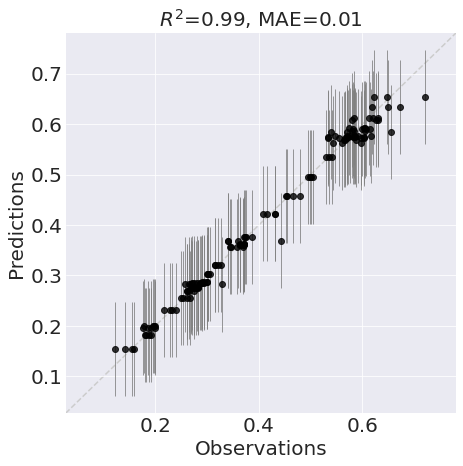

CPU times: user 4min 19s, sys: 5min 19s, total: 9min 38s
Wall time: 2min 41s


In [27]:
%%time
warnings.filterwarnings("ignore")
if run_art:
    art = RecommendationEngine(df_stacked, **art_params)
else:
    with open(os.path.join(art_params['output_directory'], 'art.pkl'), 'rb') as output:
        art = pickle.load(output)

In [25]:
art.evaluate_models_cv()

NameError: name 'art' is not defined

### Exploitation recommendations

In [28]:
%%time
art.niter = 10000
art.alpha = user_params['alpha_exploit']
draws = art.parallel_tempering_opt()


Finished 20.00 percent in 9.850031 s Acceptance rate = 0.601Adding DE jump with weight 20
Finished 90.00 percent in 40.155936 s Acceptance rate = 0.540444
Run Complete
CPU times: user 43 s, sys: 381 ms, total: 43.4 s
Wall time: 44.4 s


In [28]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_exploit.txt"
os.rename(orig_file_name, new_file_name)

In [29]:
art.num_recommendations = user_params['n_instances_exploit'] # 7 in this DBTL4
art.rel_rec_distance = 2. # Default is 0.2
# At least one of the features in the recommendation must differ by this relative factor from any point in the training data and any previous recommendations
# Then pick the one with the best objective function value and add to the recommendations. Repeat the distance filtering above. 
# Stops when 7 recommendations are found.

# If it cannot find enough recommendations, it will decrease the distance by 0.80x and try again.
art.recommend(draws)


,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
0,0.015129,0.590612,3.194382,0.060825,9.749349,2.189524,410.585506,0.000053,0.000292,0.000689,0.003515,0.000014,0.557685
1,0.026217,0.575124,3.615781,0.062405,10.668460,1.565675,382.522711,0.000053,0.000292,0.000689,0.007422,0.000014,0.527473
2,0.030969,0.750231,4.524062,0.077525,8.708021,3.371627,414.590409,0.000053,0.000292,0.000689,0.001475,0.000014,0.526793
3,0.033649,0.452340,2.408561,0.080543,11.796278,3.840703,381.050689,0.000053,0.000292,0.000689,0.003030,0.000014,0.517748
4,0.027524,0.695668,5.002758,0.083318,11.300755,4.498094,381.210484,0.000053,0.000292,0.000689,0.006725,0.000014,0.514002
5,0.015901,1.439007,5.212680,0.074597,9.843831,2.314738,380.691440,0.000053,0.000292,0.000689,0.003717,0.000014,0.512219
6,0.033329,1.409040,4.121177,0.038641,9.518149,4.868176,419.656598,0.000053,0.000292,0.000689,0.004387,0.000014,0.486274


In [41]:
df_rec_exploit = art.recommendations.copy()

Add standard deviation for the predictions:

In [42]:
type(df_rec_exploit.values[:, :-1])

numpy.ndarray

In [43]:
df_rec_exploit.values[:, :-1]

array([[1.51292359e-02, 5.90612277e-01, 3.19438188e+00, 6.08253323e-02,
        9.74934884e+00, 2.18952450e+00, 4.10585506e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 3.51540426e-03, 1.39087837e-05],
       [2.62165991e-02, 5.75124151e-01, 3.61578078e+00, 6.24052125e-02,
        1.06684602e+01, 1.56567526e+00, 3.82522711e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 7.42238925e-03, 1.39087837e-05],
       [3.09691355e-02, 7.50230706e-01, 4.52406207e+00, 7.75252070e-02,
        8.70802123e+00, 3.37162699e+00, 4.14590409e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 1.47501564e-03, 1.39087837e-05],
       [3.36494601e-02, 4.52340425e-01, 2.40856062e+00, 8.05427295e-02,
        1.17962783e+01, 3.84070337e+00, 3.81050689e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 3.02987151e-03, 1.39087837e-05],
       [2.75237264e-02, 6.95667731e-01, 5.00275758e+00, 8.33177545e-02,
        1.13007553e+01, 4.49809367e+00, 3.81210484e+02, 5.32

In [31]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_exploit.values[:, :-1]
        ) # posterior predictive statistics: mean and std

df_rec_exploit['OD340_std'] = predicted_std
df_rec_exploit['Label'] = 'exploitation' # will be used for plotting in the parity plot in notebook F

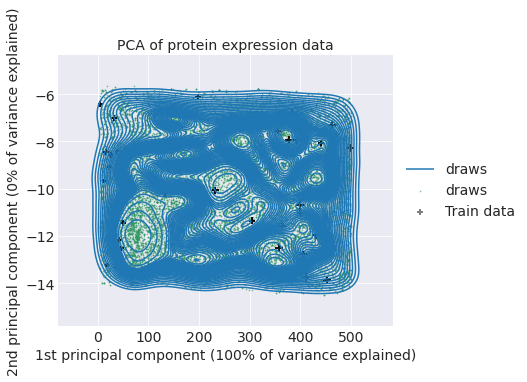

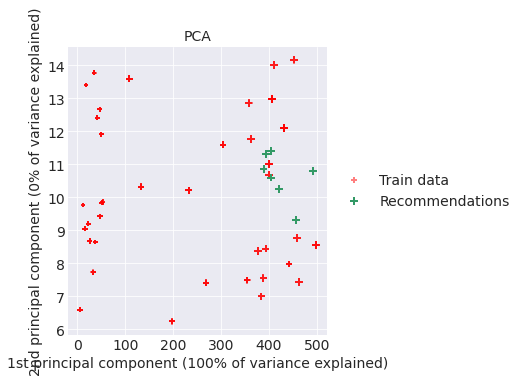

In [32]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [33]:
plot.model_pairwise(art)

### Exploration recommendations

In [34]:
%%time
art.niter = 100000
art.alpha = user_params['alpha_explor']
draws = art.parallel_tempering_opt()


Finished 2.00 percent in 9.171234 s Acceptance rate = 0.6125Adding DE jump with weight 20
Finished 99.00 percent in 395.087511 s Acceptance rate = 0.522131
Run Complete
CPU times: user 6min 26s, sys: 2.35 s, total: 6min 28s
Wall time: 6min 39s


In [35]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_explor.txt"
os.rename(orig_file_name, new_file_name)

In [44]:
art.num_recommendations = user_params['n_instances_explor']
art.rel_rec_distance = .95
art.recommend(draws)

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
0,0.015708,2.892853,2.076632,0.084810,8.487602,4.783702,389.071495,0.000151,0.002218,0.000409,0.001455,0.000896,0.427000
1,0.037575,2.757227,1.988806,0.053707,11.246286,0.488039,394.499076,0.000151,0.002218,0.000409,0.001455,0.000896,0.444495
2,0.033795,2.723947,6.346760,0.074273,12.742757,0.140396,415.106243,0.000151,0.002218,0.000409,0.001455,0.000896,0.441049
3,0.039472,2.822647,3.530045,0.055255,8.542870,3.739308,357.919721,0.000151,0.002218,0.000409,0.001455,0.000896,0.416009
4,0.018679,2.197804,0.839209,0.002354,6.849521,2.500011,102.074909,0.000151,0.002218,0.000409,0.001455,0.000896,0.294903
5,0.027711,2.670408,1.967706,0.002757,6.767351,1.930450,165.362849,0.000151,0.002218,0.000409,0.001455,0.000896,0.310001
6,0.000440,2.610425,3.770106,0.074054,8.086926,4.986358,407.046847,0.000151,0.002218,0.000409,0.001455,0.000896,0.426498
7,0.015518,2.007710,1.933205,0.001618,8.377634,4.927537,101.698615,0.000151,0.002218,0.000409,0.001455,0.000896,0.316970


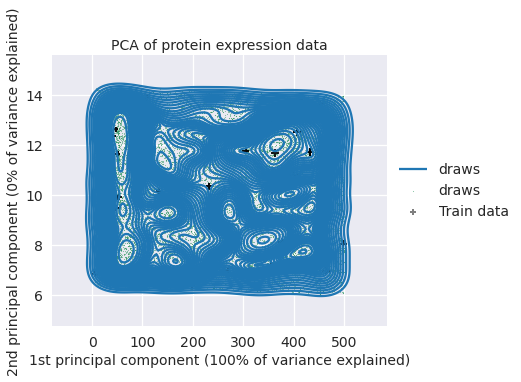

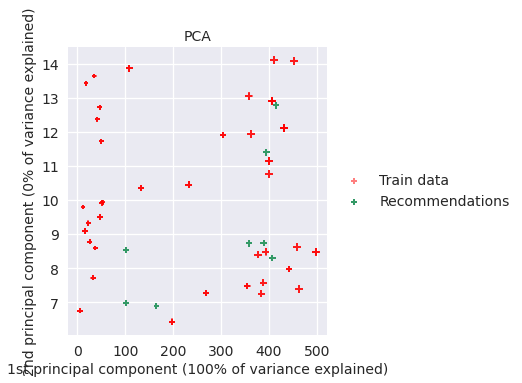

In [45]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [46]:
df_rec_explor = art.recommendations.copy()


In [47]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_explor.values[:, :-1]
        )

df_rec_explor['OD340_std'] = predicted_std
df_rec_explor['Label'] = 'exploration'

In [48]:
df_rec = df_rec_exploit.append(df_rec_explor)

In [49]:
df_rec = df_rec.rename(columns={"OD340": "OD340_pred"})

### Generate the control media 

Read the standard recipe:

In [32]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [33]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration[mM]']
    df_control.at['Control', component] = stand_conc*np.random.uniform(lb, ub)

df_control

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
Control,0.003923,0.261209,1.23803,0.01079,8.793091,0.502397,53.17405,0.000028,0.000297,0.000103,0.000839,0.000108


Check that these controls are not equivalent to the controls tested in previous cycles:

In [34]:
for component in user_params['components']:
     assert(all(df_control.at['Control', component] != control_lines[component]))

Add ART's prediction for this design

In [44]:
df_control.values

array([[1.51292359e-02, 5.90612277e-01, 3.19438188e+00, 6.08253323e-02,
        9.74934884e+00, 2.18952450e+00, 4.10585506e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 3.51540426e-03, 1.39087837e-05],
       [2.62165991e-02, 5.75124151e-01, 3.61578078e+00, 6.24052125e-02,
        1.06684602e+01, 1.56567526e+00, 3.82522711e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 7.42238925e-03, 1.39087837e-05],
       [3.09691355e-02, 7.50230706e-01, 4.52406207e+00, 7.75252070e-02,
        8.70802123e+00, 3.37162699e+00, 4.14590409e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 1.47501564e-03, 1.39087837e-05],
       [3.36494601e-02, 4.52340425e-01, 2.40856062e+00, 8.05427295e-02,
        1.17962783e+01, 3.84070337e+00, 3.81050689e+02, 5.32259185e-05,
        2.92369248e-04, 6.88506220e-04, 3.02987151e-03, 1.39087837e-05],
       [2.75237264e-02, 6.95667731e-01, 5.00275758e+00, 8.33177545e-02,
        1.13007553e+01, 4.49809367e+00, 3.81210484e+02, 5.32

In [45]:
type(df_control.values), df_control.values

(numpy.ndarray,
 array([[0.0039229037222718414, 0.26120949695008033, 1.2380298944709218,
         0.010790374104463341, 8.793091469609632, 0.5023969169292278,
         53.17405004670183, 2.772023906012581e-05, 0.0002967512082892002,
         0.00010291882626597614, 0.0008390713836132433,
         0.00010803506955712268]], dtype=object))

In [35]:
control_predicted_mean, control_predicted_std = art.post_pred_stats(
            df_control.values
        )
df_control['OD340_pred'] = control_predicted_mean
df_control['OD340_std'] = control_predicted_std
df_control['Label'] = 'standard'

XGBoostError: [15:44:19] ../src/c_api/../data/array_interface.h:139: Check failed: typestr.size() == 3 (2 vs. 3) : `typestr' should be of format <endian><type><size of type in bytes>.
Stack trace:
  [bt] (0) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x912df) [0x7fb94a44a2df]
  [bt] (1) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x98513) [0x7fb94a451513]
  [bt] (2) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9ae83) [0x7fb94a453e83]
  [bt] (3) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0xf8) [0x7fb94a43ce78]
  [bt] (4) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/../../libffi.so.7(+0x69ed) [0x7fbebe53b9ed]
  [bt] (5) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/../../libffi.so.7(+0x6077) [0x7fbebe53b077]
  [bt] (6) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13da7) [0x7fbebe554da7]
  [bt] (7) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x14434) [0x7fbebe555434]
  [bt] (8) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/bin/python(_PyObject_MakeTpCall+0x316) [0x55a4b173ebb6]



In [ ]:
df_rec = df_rec.append(df_control).reset_index(drop=True)
df_rec

### Check the distribution of designs

Define dataframe with train data and predictions:

In [72]:
df_train = df[user_params['components']]
df_train['OD340'] = df['OD340']

Add predictions, cv-predictions and standard deviation of the OD340 predictions:

In [70]:
train_predicted_mean, train_predicted_std = art.post_pred_stats(
            df_train.values[:, :-1]
        )

XGBoostError: [20:03:00] ../src/c_api/../data/array_interface.h:139: Check failed: typestr.size() == 3 (2 vs. 3) : `typestr' should be of format <endian><type><size of type in bytes>.
Stack trace:
  [bt] (0) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x912df) [0x7fa746d0f2df]
  [bt] (1) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x98513) [0x7fa746d16513]
  [bt] (2) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9ae83) [0x7fa746d18e83]
  [bt] (3) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0xf8) [0x7fa746d01e78]
  [bt] (4) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/../../libffi.so.7(+0x69ed) [0x7facccefb9ed]
  [bt] (5) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/../../libffi.so.7(+0x6077) [0x7facccefb077]
  [bt] (6) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13da7) [0x7facccf14da7]
  [bt] (7) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x14434) [0x7facccf15434]
  [bt] (8) /usr/local/share/jupyteruser/miniconda3/envs/ART_3.9.4/bin/python(_PyObject_MakeTpCall+0x316) [0x55660ef56bb6]



In [71]:
df_train['OD340_pred'] = train_predicted_mean
df_train['OD340_std'] = train_predicted_std
df_train['OD340_cv_pred'] = art.model_df_cv[0]["Predictions"]["Ensemble Model"]
df_train['OD340_cv_std'] = art.model_df_cv[0]["Predictions StDev"]["Ensemble Model"]

NameError: name 'train_predicted_mean' is not defined

Add label for control lines:

In [55]:
df_train['Label'] = 'train'

In [56]:
df_train.loc[control_lines.index, 'Label'] = 'standard'

In [57]:
df_train

Protocol,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340,OD340_pred,OD340_std,OD340_cv_pred,OD340_cv_std,Label
0,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.4422,0.374856,0.066248,0.478344,0.037749,None
1,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3405,0.374856,0.066248,0.478344,0.037749,None
2,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3397,0.374856,0.066248,0.478344,0.037749,None
3,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3602,0.374856,0.066248,0.478344,0.037749,None
4,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.60791,0.000155,0.000152,0.000029,0.00041,0.000277,0.2699,0.273986,0.066338,0.276293,0.063466,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.002467,0.119844,1.762672,0.081953,8.821329,0.279924,25.780235,0.000205,0.000291,0.000455,0.00017,0.000743,0.3065,0.307097,0.066331,0.410657,0.063867,None
92,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2934,0.295136,0.066248,0.259378,0.057191,standard
93,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2912,0.295136,0.066248,0.259378,0.057191,standard
94,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.3004,0.295136,0.066248,0.259378,0.057191,standard


Save train data set for this cycle:

In [58]:
file = f"{user_params['output_file_path']}/train_pred.csv"
df_train.to_csv(file)

In [123]:
def designs_pairwise(art, df_rec, df_train=None):

    dim = art.num_input_var

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df_rec[user_params['components']].values
    X_train = df_train[user_params['components']].values
    standard = df_train[df_train['Label']=='standard'].drop(columns='Label').values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X_train[:, var1],
                X_train[:, var2],
                c="r",
                marker="+",
                s=150*df_train['OD340'],
                lw=1,
                label="Train data",
            )
            
            ax.scatter(
                standard[:, var1],
                standard[:, var2],
                c="k",
                marker="+",
                s=150*standard[:, -1].astype(float),
                lw=1,
                label="Standard",
            )
            
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="g",
                marker="+",
                s=150*df_rec['OD340_pred'],
                lw=1,
                label="Recommendations",
            )
            
            ax.scatter(
                X[-1, var1],
                X[-1, var2],
                c="k",
                marker="+",
                s=150*df_rec['OD340_pred'].values[-1],
                lw=1,
                label="Standard",
            )
            
            
                        
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(
        f'{art.outDir}/designs_pairwise.png',
        bbox_inches="tight",
        transparent=False, 
        dpi=300
    )

In [118]:
import matplotlib.pyplot as plt

Red are train data, green are recommendations, black are standards

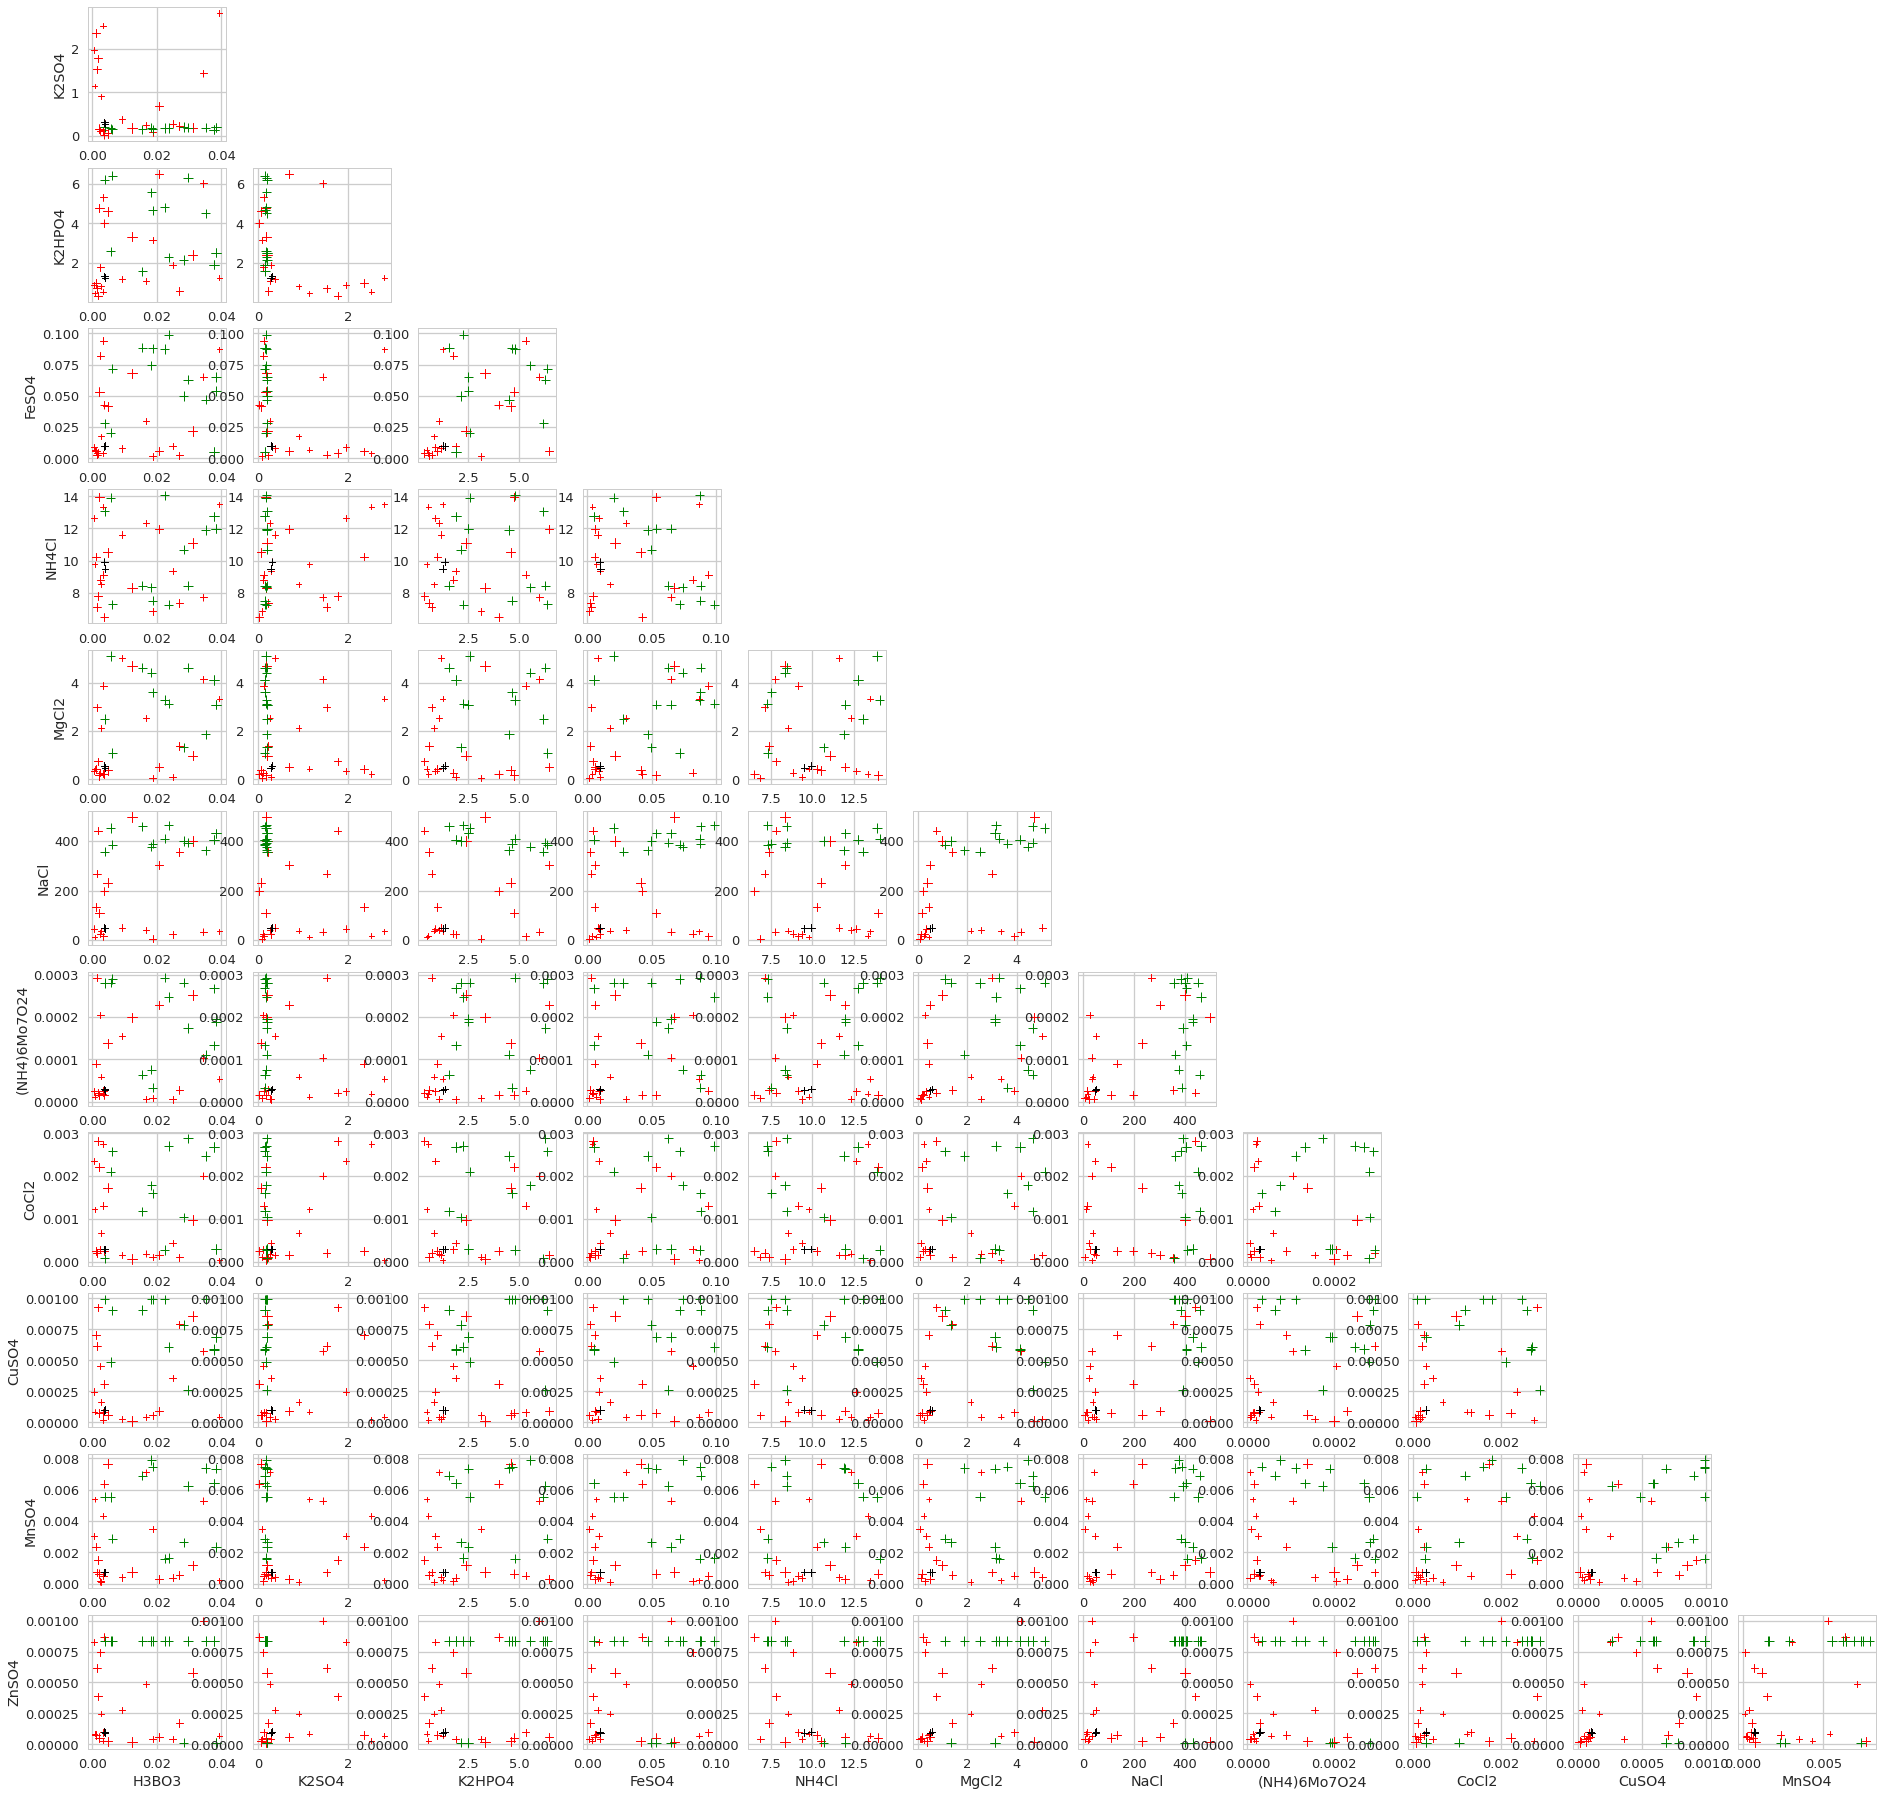

In [124]:
designs_pairwise(art, df_rec, df_train)

## Saving the generated designs

Include all replicates: 

In [36]:
df_rec = df_rec.loc[df_rec.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [40]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [38]:
well_names = [f'{row}{column}'  for column in well_columns for row in well_rows]

df_rec['Well'] = well_names
df_rec = df_rec.set_index(['Well'])
df_rec.head()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
Well,,,,,,,,,,,,,
A1,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671
B1,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671
C1,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671
D1,0.038344,0.196104,2.505369,0.06513,11.989143,3.103421,431.048016,0.000195,0.000292,0.000689,0.002345,0.000014,0.600444
E1,0.038344,0.196104,2.505369,0.06513,11.989143,3.103421,431.048016,0.000195,0.000292,0.000689,0.002345,0.000014,0.600444


In [41]:
file = f"{user_params['output_file_path']}/target_concentrations.csv"
df_rec.to_csv(file) # This file will be used for the computation of volume transfers and data analysis